In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [19]:
os.chdir('/home/sidrah19220/nmd_review/comment4/wild/immature')

In [20]:
eud_orig = pd.read_csv('euclidean.csv', index_col =0)
exp = pd.read_csv('matrix-5-Expression.csv', index_col = 0)

In [23]:
eud = eud_orig
eu = eud_orig

FINDING MATURE - IMMATURE PAIR OF ORs 

In [25]:
ors=list(exp.columns.values.tolist())
cells=exp.index.values
#exp.index = cells
tr_exp=exp.T

In [26]:
all_ors={}
zero_exp=[]
for cell in cells:
  all_ors[cell]=[]
  cell_exps=sorted(tr_exp[cell].tolist(), reverse=True)
  if cell_exps[0]>0:
    if tr_exp[cell].tolist().count(max(cell_exps)) > 8:
      for i in range(tr_exp[cell].tolist().count(max(tr_exp[cell]))):
        all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
    else:
      for i in range(8):
        if cell_exps[i]>0:
          all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
  else:
    zero_exp.append(cell)

In [27]:
cell_imt={}
cell_imm={}
cell_mat={}
for key,value in all_ors.items():
  if key.startswith("IMT"):
    cell_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imt[key].append(val)
  if key.startswith("MA"):
    cell_mat[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_mat[key].append(val)
  if key.startswith("IMM"):
    for val in value:
      cell_imm[key]=[]
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm[key].append(val)


In [28]:
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IM"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)

In [30]:
di1={}
for key,value in cell_imm_imt.items():
  di2={}
  if len(value)<1:
    continue
  else:
    for val in value:
      di2[val]=tr_exp[key][val]
    di1[key]=di2

In [32]:
len(di1)

261

0    531
1      4
dtype: int64
0    529
1      5
2      1
dtype: int64
6
0    529
1      6
dtype: int64
0    528
1      5
2      2
dtype: int64
11
0    524
1     11
dtype: int64
0    519
1     14
2      2
dtype: int64
27
0    510
1     25
dtype: int64
0    499
1     33
2      3
dtype: int64
54
0    495
1     33
2      7
dtype: int64
0    478
1     46
2     11
dtype: int64
107
0    479
1     42
2     14
dtype: int64
0    462
1     46
2     23
3      4
dtype: int64
161
0    470
1     37
2     28
dtype: int64
0    450
1     40
2     33
3     11
4      1
dtype: int64
267
0    459
1     47
2     29
dtype: int64
0    437
1     44
2     37
3     13
4      4
dtype: int64
321
0    451
1     48
2     32
3      4
dtype: int64
0    426
1     49
2     28
3     20
4     12
dtype: int64
374
0    444
1     50
2     32
3      9
dtype: int64
0    421
1     48
3     26
2     24
4     16
dtype: int64
428
0    440
1     47
2     32
3     16
dtype: int64
0    417
1     49
3     30
4     20
2     17
5      2

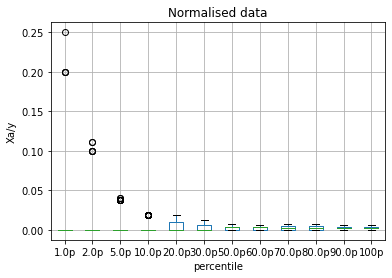

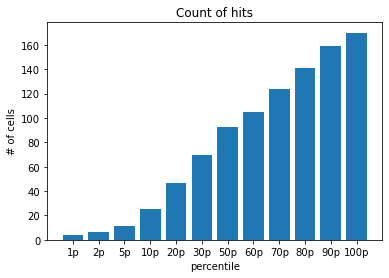

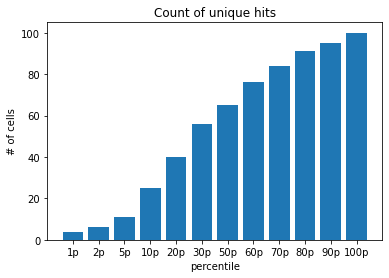

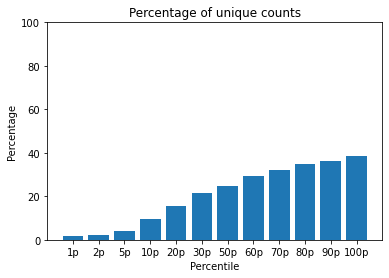

In [33]:
#GENERATE UNIQUE HITS
os.chdir('/home/sidrah19220/nmd_review/comment4/wild/immature')
ratio_data={}
unique_number = {}
unique_percentage = {}
for folder in range(1):
    di='test_'+str(folder)
    os.mkdir(di)
    os.chdir(di) 
        #A FILE IS GENERATED WITH ALL INFORMATION OF mOSN, iOSN/tOSN, THE EUCLIDEAN DISTANCE AND OR EXPRESSED
    with open("Out_data_eud_"+str(folder)+".csv","w")as fout:
        fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
        empty_mat=[]
        mat_cell=eud.index
        imm_imt_cells=list(eud.columns.values.tolist())
        for i in range(len(mat_cell)):
            mat1={}
            for j in range(len(imm_imt_cells)):
                mat1[eud.iloc[i][j]]=imm_imt_cells[j]
            euds=sorted(mat1.keys(), reverse=False)
            for j in range(len(euds)):
                if len(cell_mat[mat_cell[i]])==0:
                    empty_mat.append(mat_cell[i])
                else:
                    if cell_mat[mat_cell[i]][0] in cell_imm_imt[mat1[euds[j]]]:
                        for k in range(len(cell_imm_imt[mat1[euds[j]]])):
                            if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]][0]:
                                fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')
        
        
        #CALCULATING PERCENTILE AT DIFFERENT THRESHOLD FOR EUC DISTANCE
    eu = eud
    li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for ki in li:
        q = eu.quantile(ki , axis = 1)
        q1 = q.tolist()
        qq = pd.DataFrame(q)

        idd = eu.index.tolist()
        ccl = eu.columns.tolist()
        d4=dict.fromkeys(idd)

        #loop to generate imm cells
        k = []
        for i in range(len(idd)):
            for j in range(len(ccl)):
                if eu.iloc[i][j] < q1[i]:
                    k.append(ccl[j])
            d4[idd[i]] = k
            k=[]

        p = []
        for i in idd:
            p.append(len(d4[i]))
        cells = pd.DataFrame.from_dict(d4, orient='index')
        cells.to_csv(str(ki)+'percentile_euc_total_immature.csv')
    
    
    #ASSIGNING THE STATUS POSITIVE AND NEGATIVE ON BASIS OF THE mOSN THAT LIE IN THAT PARTICULAR THRESHOLD
    for ki in li:
        p=pd.read_csv(str(ki)+'percentile_euc_total_immature.csv', index_col = 0)
        o = pd.read_csv('Out_data_eud_'+str(folder)+'.csv')
        o = o[o[' ED']!=0]
        dictt={}
        v =  o['Mature Cell ID'].tolist()
        v2 = o['Immature/Transition Cell ID'].tolist()
        for indx in range(len(v)):
            if v[indx]==v[indx-1]:
                dictt[v[indx]].append(v2[indx])
            else:
                dictt[v[indx]]=[]
                dictt[v[indx]].append(v2[indx])
        ke=[]
        for key in dictt:
            ke.append(key)
        pp = p.loc[ke].T
        ppp1 = pp.to_dict('list')
        dup = o
        ind = dup.index.tolist()
        stat=[]
        for i in range(0,len(dup['Immature/Transition Cell ID'])):
            if dup['Immature/Transition Cell ID'][ind[i]] in ppp1[dup['Mature Cell ID'][ind[i]]]:
                stat.append('Positive')
            else:
                stat.append('Negative')

        dup['status'] = stat
        #dup.to_csv('Final_spl_10q.csv')
        dup.to_csv(str(ki)+'percentile_neg_pos_out_data.csv')
        euk = dup[(dup['status']=='Positive') & (dup['Expression Diffrence from rank1']==0)]
        euk.to_csv(str(ki)+'_final_res.csv')

        #CREATING A DATAFRAME AT DIFFERENT PERCENTILE SHOWING RATIO OF EXPRESSED ORs HAVING HIGHEST EXPRESSION TO NON-EXPRESSED
    DF4=pd.DataFrame()
    for ki in li:
        x = pd.read_csv(str(ki)+'_final_res.csv', index_col = 0)
        o = pd.read_csv('Out_data_eud_'+str(folder)+".csv", index_col =0)
        o = o[o[' ED']!=0]
        eu = eud
        mat_uniq = eu.index.tolist()
        dictt={}
        v =  x['Mature Cell ID'].tolist()
        v2 = x['Immature/Transition Cell ID'].tolist()

        for indx in range(len(v)):
            if v[indx]==v[indx-1]:

                dictt[v[indx]].append(v2[indx])
            else:
                dictt[v[indx]]=[]
                dictt[v[indx]].append(v2[indx])
        xa_dict={}
        for ma in mat_uniq:
            if ma in dictt.keys():
                xa_dict[ma]=len(dictt[ma])
            else:
                xa_dict[ma]=0
        df2 = pd.DataFrame.from_dict(xa_dict, orient='index')
        print(df2.value_counts())

        pos_neg = pd.read_csv(str(ki)+'percentile_neg_pos_out_data.csv')
        pos_neg2 = pos_neg[pos_neg['status'] == 'Positive']
        dictt2={}
        v =  pos_neg2['Mature Cell ID'].tolist()
        v2 = pos_neg2['Immature/Transition Cell ID'].tolist()

        for indx in range(len(v)):
            if v[indx]==v[indx-1]:

                dictt2[v[indx]].append(v2[indx])
            else:
                dictt2[v[indx]]=[]
                dictt2[v[indx]].append(v2[indx])

        x_dict={}
        for ma in mat_uniq:
            if ma in dictt2.keys():
                x_dict[ma]=len(dictt2[ma])
            else:
                x_dict[ma]=0

        df3 = pd.DataFrame.from_dict(x_dict, orient='index')
        print(df3.value_counts())
        df3.columns = ['x']
        percentile = pd.read_csv(str(ki)+'percentile_euc_total_immature.csv', index_col =0)
        xny=len(percentile.columns.values.tolist())
        print(xny)
        if len(percentile.index.values.tolist())==len(df3):
            df3['y'] = xny - df3['x'] 
        xa = df2[0].values.tolist()
        df3['xa'] = xa
        df3['xay'] = df3['xa']/df3['y']
        df3.to_csv(str(ki*100)+'percentile_boxplot.csv')

        DF4[str(ki*100)+'p']=df3['xay']

    #DF4.to_csv('plot_boxplot_euclidean.csv')
    p  = o.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')['Mature Cell ID'].tolist()
    DF4.loc[p].boxplot()
    plt.xlabel('percentile')
    plt.ylabel('Xa/y')
    plt.title('Normalised data')
    plt.savefig('normalised_data_euclidean.pdf')
    plt.show()

    o_unique = o.drop_duplicates(subset = 'Mature Cell ID', keep ='first')
    mat_uniq= o_unique['Mature Cell ID'].values.tolist()
    dictt={}
    v =  o['Mature Cell ID'].tolist()
    v2 = o['Immature/Transition Cell ID'].tolist()

    for indx in range(len(v)):
        if v[indx]==v[indx-1]:

            dictt[v[indx]].append(v2[indx])
        else:
            dictt[v[indx]]=[]
            dictt[v[indx]].append(v2[indx])

    f1 = pd.read_csv('0.01_final_res.csv')
    f2 = pd.read_csv('0.02_final_res.csv')
    f5 = pd.read_csv('0.05_final_res.csv')
    f10 = pd.read_csv('0.1_final_res.csv')
    f20 = pd.read_csv('0.2_final_res.csv')
    f30 = pd.read_csv('0.3_final_res.csv')
    f50 = pd.read_csv('0.5_final_res.csv')
    f60 = pd.read_csv('0.6_final_res.csv')
    f70 = pd.read_csv('0.7_final_res.csv')
    f80 = pd.read_csv('0.8_final_res.csv')
    f90 = pd.read_csv('0.9_final_res.csv')
    f100 = pd.read_csv('1_final_res.csv')

        #PLOT OF NUMBER OF HITS
    
    liii=[f1, f2, f5, f10, f20, f30, f50, f60, f70, f80, f90, f100]
    valss=[]
    for i in liii:
        valss.append(len(i))

    x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(x,valss)
    plt.title('Count of hits')
    plt.xlabel('percentile')
    plt.ylabel('# of cells')
    plt.savefig('number of hits euclidean.pdf')
    plt.show()

    unique_f1 = f1.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f2 = f2.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f5 = f5.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f10 = f10.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f20 = f20.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f30 = f30.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f50 = f50.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f60 = f60.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f70 = f70.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f80 = f80.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f90 = f90.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f100 = f100.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')

    
    #PLOT OF NUMBER OF UNIQUE mOSNs 

    liii=[unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, unique_f80,
          unique_f90, unique_f100]
    valss_unique=[]
    for i in liii:
        valss_unique.append(len(i))

    unique_number[str(folder)]=valss_unique
    
    gra = pd.DataFrame(valss_unique)
    gra.to_csv('unique-count.csv')
    
    
    x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(x,valss_unique)
    plt.title('Count of unique hits')
    plt.xlabel('percentile')
    plt.ylabel('# of cells')
    plt.savefig('number of unique hits euclidean.pdf')
    plt.show()
    
    
    #PERCENTAGE OF UNIQUE mOSNs
    valssf=[]
    for v in valss_unique:
        valssf.append((v/261)*100)
        
    unique_percentage[str(folder)]=valssf
    
    
    gra = pd.DataFrame(valssf)
    gra.to_csv('unique-percentage.csv')
    

    plt.bar(x,valssf)
    plt.title('Percentage of unique counts')
    plt.xlabel('Percentile')
    plt.ylabel('Percentage')
    plt.savefig('percentage')
    plt.yticks([0, 20, 40, 60, 80, 100])
    plt.savefig('percentage_test_divbyunique.pdf')
    plt.show()
    
    os.chdir('/home/sidrah19220/nmd_review/comment4/wild/immature')